In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'traffic/traffic.csv', index_col=0)

In [4]:
etth1.head()

,0
Date,
2015-01-01 00:00:00,0.0048
2015-01-01 01:00:00,0.0072
2015-01-01 02:00:00,0.0040
2015-01-01 03:00:00,0.0039
2015-01-01 04:00:00,0.0042


In [16]:
etth1.shape

(17544, 1)

<Axes: xlabel='Date'>

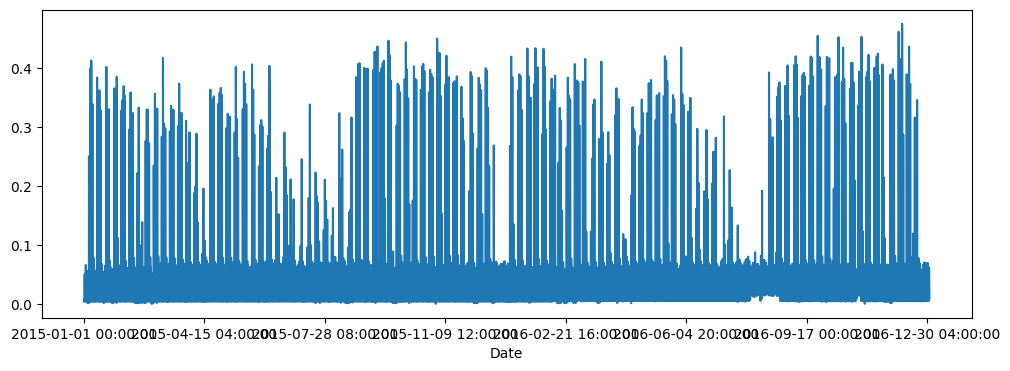

In [5]:
plt.figure(figsize=(12,4))
etth1['0'].plot()

In [6]:
scaler = MinMaxScaler()
timeseries = etth1['0']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='Date'>

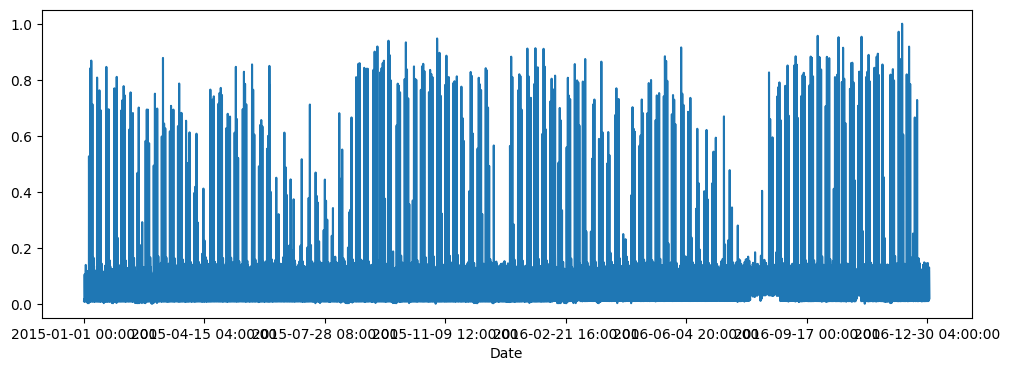

In [7]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [8]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1602861050
Epoch 2, Boundaries delta: 0.0714809471, Codewords delta: 0.0498398125
Epoch 3, Boundaries delta: 0.0472462964, Codewords delta: 0.0426949930
Epoch 4, Boundaries delta: 0.0405499660, Codewords delta: 0.0358300531
Epoch 5, Boundaries delta: 0.0337405735, Codewords delta: 0.0276814101
Epoch 6, Boundaries delta: 0.0247825057, Codewords delta: 0.0214620198
Epoch 7, Boundaries delta: 0.0196231055, Codewords delta: 0.0176054595
Epoch 8, Boundaries delta: 0.0169044658, Codewords delta: 0.0142662315
Epoch 9, Boundaries delta: 0.0135879403, Codewords delta: 0.0109332016
Epoch 10, Boundaries delta: 0.0104579872, Codewords delta: 0.0084812794
Epoch 11, Boundaries delta: 0.0085263579, Codewords delta: 0.0074899084
Epoch 12, Boundaries delta: 0.0077905140, Codewords delta: 0.0071000112
Epoch 13, Boundaries delta: 0.0074163407, Codewords delta: 0.0063752555
Epoch 14, Boundaries delta: 0.0065472969, Codewords delta: 0.0056200740
E

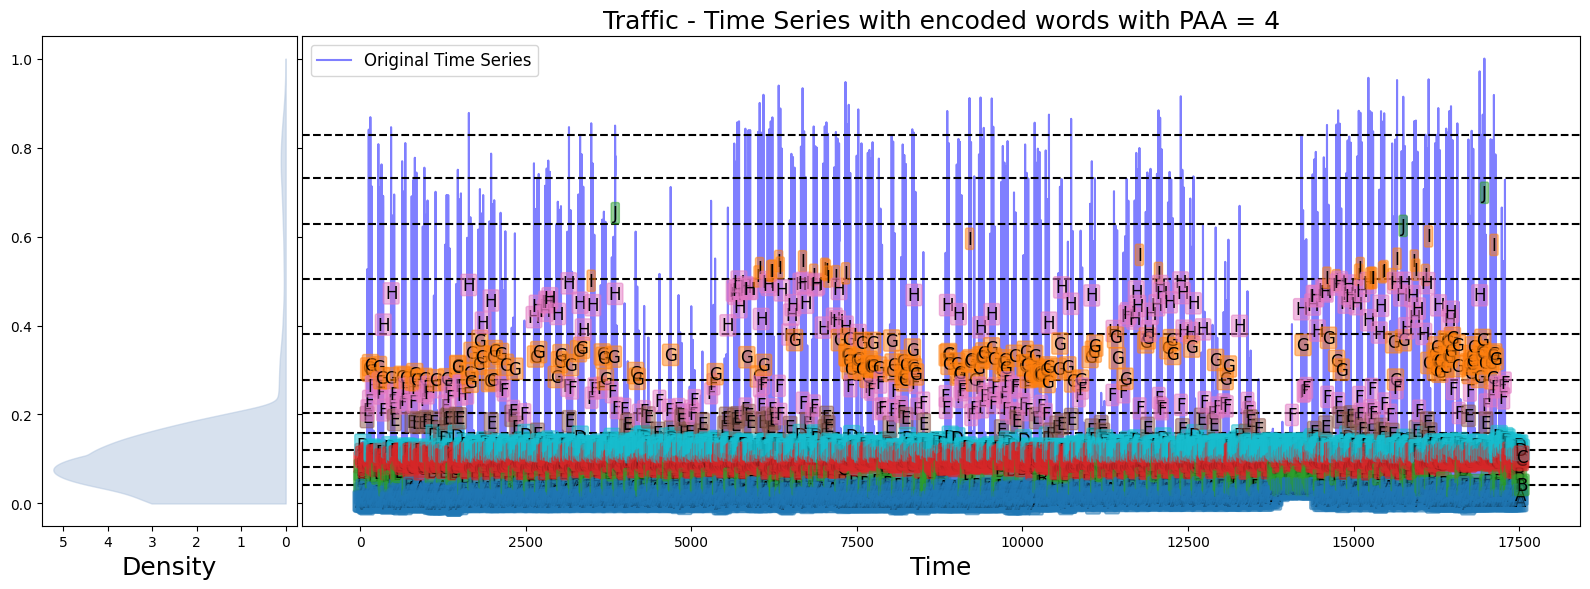

In [10]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="traffic/traffic_ksax.png", data_name='Traffic')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"traffic/traffic_ksax.csv")

### Stationary

<Axes: xlabel='Date'>

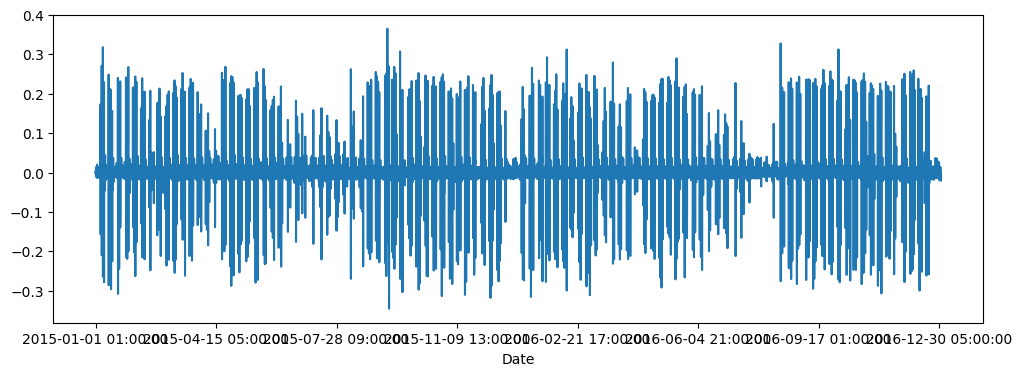

In [13]:
target = etth1['0']
target = target.diff().dropna()
plt.figure(figsize=(12,4))
target.plot()

In [14]:
target.head()

Date
2015-01-01 01:00:00    0.0024
2015-01-01 02:00:00   -0.0032
2015-01-01 03:00:00   -0.0001
2015-01-01 04:00:00    0.0003
2015-01-01 05:00:00   -0.0002
Name: 0, dtype: float64

Epoch 1, Boundaries delta: 0.1356289565, Codewords delta: 0.1453372538
Epoch 2, Boundaries delta: 0.0495614003, Codewords delta: 0.0316432880
Epoch 3, Boundaries delta: 0.0315492488, Codewords delta: 0.0205104357
Epoch 4, Boundaries delta: 0.0202538463, Codewords delta: 0.0130551797
Epoch 5, Boundaries delta: 0.0123400728, Codewords delta: 0.0101388978
Epoch 6, Boundaries delta: 0.0090960829, Codewords delta: 0.0084082400
Epoch 7, Boundaries delta: 0.0072238939, Codewords delta: 0.0076753450
Epoch 8, Boundaries delta: 0.0063189919, Codewords delta: 0.0078599954
Epoch 9, Boundaries delta: 0.0060287095, Codewords delta: 0.0061751691
Epoch 10, Boundaries delta: 0.0048339025, Codewords delta: 0.0044671977
Epoch 11, Boundaries delta: 0.0037387681, Codewords delta: 0.0035876529
Epoch 12, Boundaries delta: 0.0031642966, Codewords delta: 0.0032034578
Epoch 13, Boundaries delta: 0.0028766742, Codewords delta: 0.0031238369
Epoch 14, Boundaries delta: 0.0027764176, Codewords delta: 0.0033883890
E

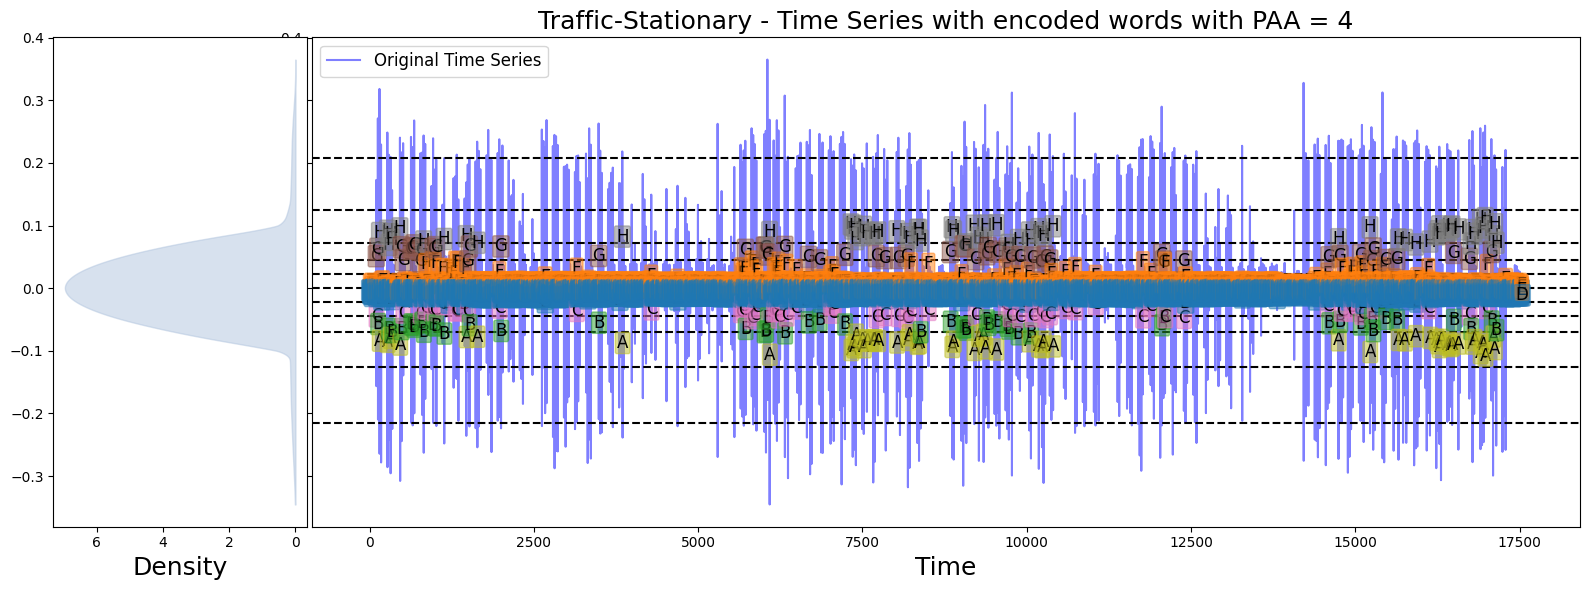

In [15]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="traffic/traffic_stationary_ksax.png", data_name='Traffic-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"traffic/traffic_stationary_ksax.csv")